In [8]:
import pandas as pd
import numpy as nd
import sys
import matplotlib.pylab as plt

data12 = pd.read_csv("PERM_2012.csv")
data13 = pd.read_csv("PERM_2013.csv")
data14 = pd.read_csv("PERM_2014.csv")
data15 = pd.read_csv("PERM_2015.csv")
data16 = pd.read_csv("PERM_2016.csv")
data17 = pd.read_csv("PERM_2017.csv")
data18 = pd.read_csv("PERM_2018.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
class state:
    stateName = ""
    numApp = 0
    numCert = 0
    certRate = 0.0

    def __init__(self, name):
        self.stateName = name

    def update(self, status):
        if status != "Withdrawn":
            self.numApp += 1;
        if status == "Certified" or status == "Certified-Expired":
            self.numCert += 1
        if self.numApp!=0:
            self.certRate = self.numCert/self.numApp

In [10]:
data13 = data13.rename(str.upper, axis='columns')
data14 = data14.rename(str.upper, axis='columns')
#df = df.rename(index=str, columns={"A": "a", "B": "c"})
stateStatus12 = data12[["JOB_INFO_WORK_STATE", "CASE_STATUS"]]
stateStatus13 = data13[["JOB_INFO_WORK_STATE", "CASE_STATUS"]]
stateStatus14 = data14[["JOB_INFO_WORK_STATE", "CASE_STATUS"]]
stateStatus15 = data15[["JOB_INFO_WORK_STATE", "CASE_STATUS"]]
stateStatus16 = data16[["JOB_INFO_WORK_STATE", "CASE_STATUS"]]
stateStatus17 = data17[["JOB_INFO_WORK_STATE", "CASE_STATUS"]]
stateStatus18 = data18[["JOB_INFO_WORK_STATE", "CASE_STATUS"]]
stateStatus = pd.concat([stateStatus17, stateStatus18])

In [11]:
statename_to_abbr = {
    'Alabama': 'AL',
    'Montana': 'MT',
    'Alaska': 'AK',
    'Nebraska': 'NE',
    'Arizona': 'AZ',
    'Nevada': 'NV',
    'Arkansas': 'AR',
    'New Hampshire': 'NH',
    'California': 'CA',
    'New Jersey': 'NJ',
    'Colorado': 'CO',
    'New Mexico': 'NM',
    'Connecticut': 'CT',
    'New York': 'NY',
    'Delaware': 'DE',
    'North Carolina': 'NC',
    'Florida': 'FL',
    'North Dakota': 'ND',
    'Georgia': 'GA',
    'Ohio': 'OH',
    'Hawaii': 'HI',
    'Oklahoma': 'OK',
    'Idaho': 'ID',
    'Oregon': 'OR',
    'Illinois': 'IL',
    'Pennsylvania': 'PA',
    'Indiana': 'IN',
    'Rhode Island': 'RI',
    'Iowa': 'IA',
    'South Carolina': 'SC',
    'Kansas': 'KS',
    'South Dakota': 'SD',
    'Kentucky': 'KY',
    'Tennessee': 'TN',
    'Louisiana': 'LA',
    'Texas': 'TX',
    'Maine': 'ME',
    'Utah': 'UT',
    'Maryland': 'MD',
    'Vermont': 'VT',
    'Massachusetts': 'MA',
    'Virginia': 'VA',
    'Michigan': 'MI',
    'Washington': 'WA',
    'Minnesota': 'MN',
    'West Virginia': 'WV',
    'Mississippi': 'MS',
    'Wisconsin': 'WI',
    'Missouri': 'MO',
    'Wyoming': 'WY',
}
statesList = []
state2abbr={}
abbr2state={}
for k,v in statename_to_abbr.items():
    statesList.append(k.upper())
    state2abbr[k.upper()]=v
    abbr2state[v]=k.upper()


In [6]:
s = []
#gather data and count different casestatus
for i in range(0,len(stateStatus)):
    stateN = stateStatus.iloc[i][0]
    status = stateStatus.iloc[i][1]
    #print(stateN)
    if type(stateN) != str:
        continue
    if len(stateN)==2:
        if stateN in abbr2state:
            stateN = abbr2state[stateN]  
        else:
            continue
    stateN = stateN.upper()
    if stateN not in statesList:
        continue
    found = False
    for j in range(0,len(s)):        
        if s[j].stateName == stateN:
            found = True
            s[j].update(status)
            break
    if found == False:
        newState = state(stateN)
        s.append(newState)          

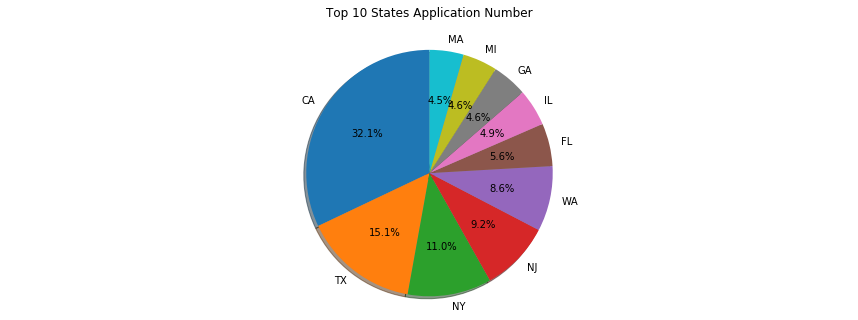

In [7]:
stateArray=[]
numAppArray=[]
certRateArray=[]
import operator
s.sort(key=operator.attrgetter('numApp'), reverse = True)
for i in range(0, 10):
    stateArray.append(state2abbr[s[i].stateName])
    numAppArray.append(s[i].numApp) 
counter=0
'''for i in range(10, len(s)):
    counter = counter + s[i].numApp
stateArray.append("Other")
numAppArray.append(counter)'''
plt.figure(figsize=(15,5))
plt.pie(numAppArray, labels=stateArray, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Top 10 States Application Number\n")
plt.savefig("./Top 10 States Application Number.png")
plt.show()


Text(0.5,1,'title')

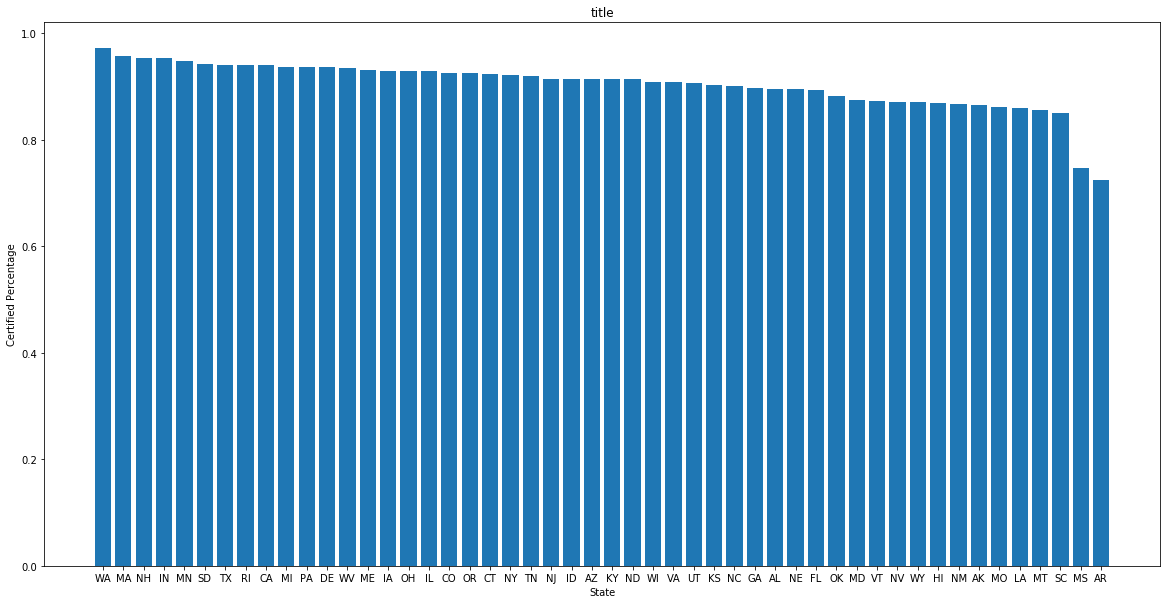

In [64]:
stateArray2=[]
certRateArray=[]
import operator
s.sort(key=operator.attrgetter('certRate'), reverse = True)
for i in range(0, 50):
    stateArray2.append(state2abbr[s[i].stateName])
    certRateArray.append(s[i].certRate)
plt.figure(figsize=(20,10))
plt.bar(stateArray2, certRateArray)
plt.xlabel("State")
plt.ylabel("Certified Percentage")
plt.title("title")

In [39]:
def temporal_graph(x_data,y_data,xlabel,ylabel,title):
    plt.figure(figsize=(6.5,4))
    plt.plot(x_data, y_data, linewidth=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig("./temporal4.pdf")

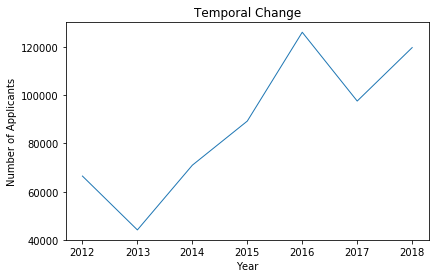

In [40]:
y=[2012, 2013, 2014, 2015, 2016, 2017, 2018]
l=[len(data12),len(data13),len(data14),len(data15),len(data16), len(data17),len(data18)]

temporal_graph(y,l,"Year","Number of Applicants","Temporal Change")

In [32]:
ratecal=[0.863, 0.857, 0.935, 0.93, 0.954,0.93,0.946]

In [24]:
data12["CASE_STATUS"].value_counts()

Certified-Expired    54579
Denied                8642
Withdrawn             3265
Certified                2
Name: CASE_STATUS, dtype: int64

In [25]:
data13["CASE_STATUS"].value_counts()

Certified-Expired    21461
Certified            13742
Denied                5874
Withdrawn             3075
Name: CASE_STATUS, dtype: int64

In [26]:
data14["CASE_STATUS"].value_counts()

Certified            35615
Certified-Expired    27018
Denied                4349
Withdrawn             4016
Name: CASE_STATUS, dtype: int64

In [27]:
data15["CASE_STATUS"].value_counts()

Certified            41223
Certified-Expired    37715
Denied                5999
Withdrawn             4362
Name: CASE_STATUS, dtype: int64

In [28]:
data16["CASE_STATUS"].value_counts()

Certified            58750
Certified-Expired    57183
Denied                5560
Withdrawn             4650
Name: CASE_STATUS, dtype: int64

In [29]:
data17["CASE_STATUS"].value_counts()

Certified-Expired    45529
Certified            42080
Denied                6413
Withdrawn             3581
Name: CASE_STATUS, dtype: int64

In [30]:
data18["CASE_STATUS"].value_counts()

Certified            72187
Certified-Expired    37363
Denied                6255
Withdrawn             3971
Name: CASE_STATUS, dtype: int64

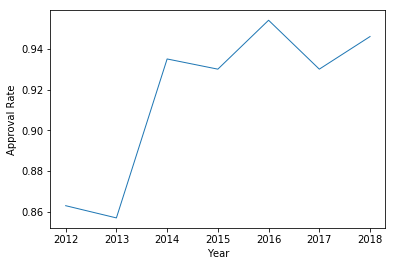

In [35]:
temporal_graph(y,ratecal,"Year","Approval Rate","")